In [1]:
pip install fastai

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade fastai

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install opencv-python

In [5]:
#Import Libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import zipfile

In [6]:
#Read in data from a zip file
np.random.seed(40)

# Define the path to the zip file and the extraction path
zip_path = 'Stunting_dataset.zip'  # Ensure this is the correct file name and path
extract_path = Path('./extracted_stunting_dataset')

# Verify if the zip file exists
if not Path(zip_path).exists():
    raise FileNotFoundError(f"Zip file not found: {zip_path}")

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Set the path to the extracted dataset
path = extract_path / 'Stunting dataset'
print(path.ls())

# Check the contents of the extracted folders
print((path/'malnourished').ls())
print((path/'normal').ls())


[Path('extracted_stunting_dataset/Stunting dataset/malnourished'), Path('extracted_stunting_dataset/Stunting dataset/normal')]
[Path('extracted_stunting_dataset/Stunting dataset/malnourished/37.jpg'), Path('extracted_stunting_dataset/Stunting dataset/malnourished/38.jpg'), Path('extracted_stunting_dataset/Stunting dataset/malnourished/39.jpeg'), Path('extracted_stunting_dataset/Stunting dataset/malnourished/40.jpeg'), Path('extracted_stunting_dataset/Stunting dataset/malnourished/41.jpeg'), Path('extracted_stunting_dataset/Stunting dataset/malnourished/42.jpeg'), Path('extracted_stunting_dataset/Stunting dataset/malnourished/43.jpeg'), Path('extracted_stunting_dataset/Stunting dataset/malnourished/44.jpeg'), Path('extracted_stunting_dataset/Stunting dataset/malnourished/45.jpeg'), Path('extracted_stunting_dataset/Stunting dataset/malnourished/46.jpeg'), Path('extracted_stunting_dataset/Stunting dataset/malnourished/47.jpeg'), Path('extracted_stunting_dataset/Stunting dataset/malnourish

In [9]:
print(data.c)

2


In [10]:
np.random.seed(40)  # Setting seed again for reproducibility

data = ImageDataLoaders.from_folder(
    path, 
    train=".",  # The root folder will be used for training
    valid_pct=0.2,  # 20% of the data will be used for validation
    item_tfms=Resize(224),  # Resize images to 224x224
    batch_tfms=aug_transforms(),  # Apply data augmentations
    num_workers=4  # Number of workers for data loading
)
print(f"Number of classes: {data.c}")

Number of classes: 2


In [12]:
learn = vision_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

SuggestedLRs(valley=0.0008317637839354575)

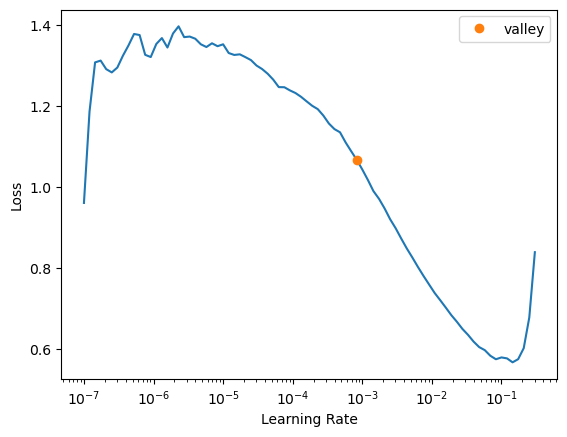

In [13]:
learn.lr_find()

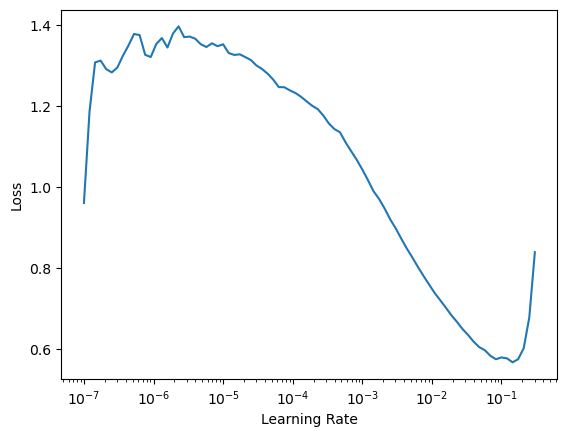

In [14]:
learn.recorder.plot_lr_find()

In [15]:
learn.fine_tune(epochs=100, base_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.408665,2.707328,0.526316,00:05


epoch,train_loss,valid_loss,accuracy,time
0,1.249527,2.090161,0.526316,00:06
1,1.028865,1.650205,0.578947,00:06
2,1.017952,1.273359,0.578947,00:06
3,1.031253,1.015748,0.526316,00:06
4,0.989621,0.847679,0.473684,00:06
5,1.017297,0.738003,0.526316,00:06
6,0.973944,0.660098,0.526316,00:06
7,0.949267,0.597910,0.684211,00:06
8,0.941618,0.563403,0.789474,00:06
9,0.892335,0.537573,0.789474,00:06


In [16]:
lr1 = 1e-3

learn.fit_one_cycle(100,lr1)

epoch,train_loss,valid_loss,accuracy,time
0,0.002536,0.166882,0.947368,00:06
1,0.005076,0.160644,0.947368,00:05
2,0.008188,0.169765,0.947368,00:05
3,0.007004,0.167729,0.947368,00:06
4,0.006733,0.169541,0.947368,00:05
5,0.005778,0.163660,0.947368,00:06
6,0.005056,0.160832,0.947368,00:05
7,0.004544,0.161339,0.947368,00:05
8,0.004043,0.158640,0.947368,00:06
9,0.004566,0.154990,0.947368,00:05


In [17]:
learn.freeze_to(-2)
learn.fit_one_cycle(5, slice(1e-5, 1e-3))
learn.freeze_to(-3)
learn.fit_one_cycle(5, slice(1e-5, 1e-3))
learn.unfreeze()
learn.fit_one_cycle(5, slice(1e-5, 1e-3))


epoch,train_loss,valid_loss,accuracy,time
0,0.000088,0.005677,1.000000,00:05
1,0.000201,0.004874,1.000000,00:05
2,0.000223,0.003948,1.000000,00:05
3,0.000985,0.005394,1.000000,00:05
4,0.000806,0.006557,1.000000,00:05


epoch,train_loss,valid_loss,accuracy,time
0,0.000354,0.005725,1.000000,00:05
1,0.000186,0.008047,1.000000,00:06
2,0.000150,0.008776,1.000000,00:05
3,0.000127,0.010111,1.000000,00:05
4,0.000109,0.008626,1.000000,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.000030,0.007537,1.000000,00:06
1,0.000069,0.006930,1.000000,00:06
2,0.000048,0.007260,1.000000,00:06
3,0.000057,0.008946,1.000000,00:06
4,0.000048,0.010369,1.000000,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.000008,0.012231,1.000000,00:06
1,0.000212,0.030948,1.000000,00:05
2,0.001525,0.004054,1.000000,00:06
3,0.001174,0.003350,1.000000,00:05
4,0.001597,0.003146,1.000000,00:05


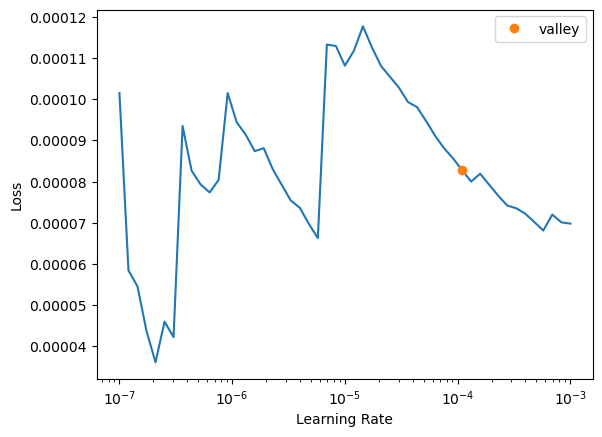

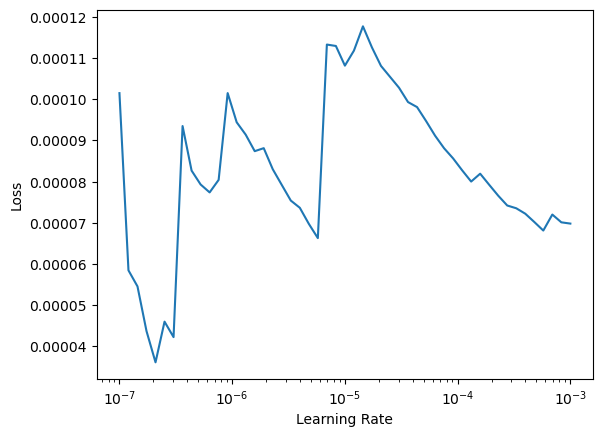

In [18]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot_lr_find()
learn.fit_one_cycle(5, slice(1e-3,1e-5), cbs=EarlyStoppingCallback(monitor='valid_loss', patience=3))

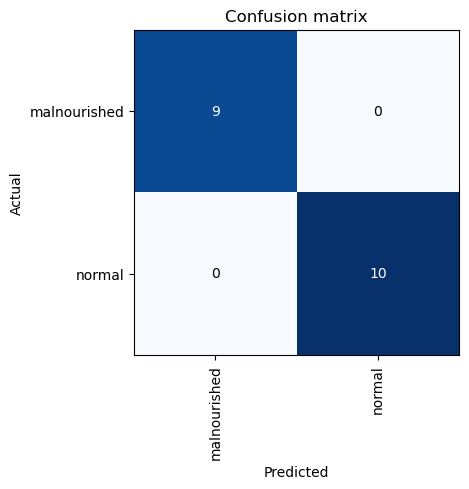

In [29]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Predicted class: normal


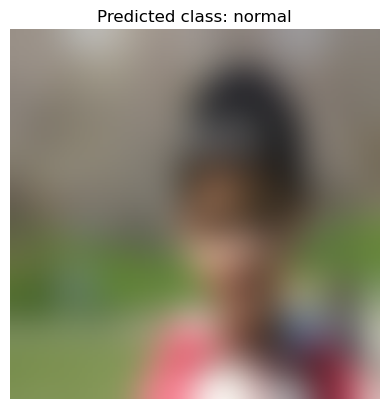

In [24]:

from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

# Define a function to load and preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize the image to match the input size of the model
    return img

# Define a function to predict the class of the input image
def predict_image_class(image_path, learner):
    img = preprocess_image(image_path)
    prediction = learner.predict(img)
    return prediction[0]  # Return the predicted class label

# Define the path to the image you want to test
test_image_path = '2_normal.jpeg'

# Make the prediction
prediction = predict_image_class(test_image_path, learn)
print("Predicted class:", prediction)

img = preprocess_image(test_image_path)
blurred_img = blur_image(img)

# Display the blurred image along with the predicted class label
plt.imshow(blurred_img)
plt.title("Predicted class: " + prediction)
plt.axis('off')
plt.show()



Predicted class: malnourished


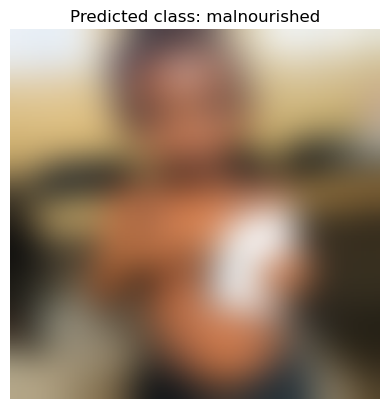

In [21]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

# Define a function to load and preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize the image to match the input size of the model
    return img

# Define a function to predict the class of the input image
def predict_image_class(image_path, learner):
    img = preprocess_image(image_path)
    prediction = learner.predict(img)
    return prediction[0]  # Return the predicted class label

# Define a function to blur the image
def blur_image(img, blur_radius=10):
    return img.filter(ImageFilter.GaussianBlur(blur_radius))

# Define the path to the image you want to test
test_image_path = '37.jpg'

# Make the prediction
prediction = predict_image_class(test_image_path, learn)
print("Predicted class:", prediction)

# Preprocess and blur the image for display
img = preprocess_image(test_image_path)
blurred_img = blur_image(img)

# Display the blurred image along with the predicted class label
plt.imshow(blurred_img)
plt.title("Predicted class: " + prediction)
plt.axis('off')
plt.show()



Predicted class: malnourished


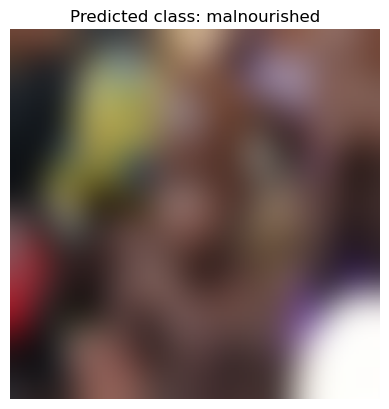

In [25]:
from PIL import Image
import matplotlib.pyplot as plt

# Define a function to load and preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize the image to match the input size of the model
    return img

# Define a function to predict the class of the input image
def predict_image_class(image_path, learner):
    img = preprocess_image(image_path)
    prediction = learner.predict(img)
    return prediction[0]  # Return the predicted class label

# Define the path to the image you want to test
test_image_path = 'OIP.jpg'

# Make the prediction
prediction = predict_image_class(test_image_path, learn)
print("Predicted class:", prediction)

# Display the image along with the predicted class label
img = preprocess_image(test_image_path)
blurred_img = blur_image(img)

# Display the blurred image along with the predicted class label
plt.imshow(blurred_img)
plt.title("Predicted class: " + prediction)
plt.axis('off')
plt.show()




Predicted class: normal


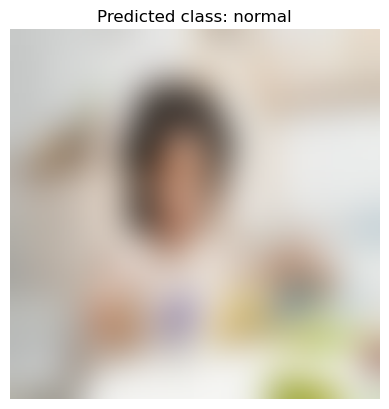

In [30]:
from PIL import Image
import matplotlib.pyplot as plt

# Define a function to load and preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize the image to match the input size of the model
    return img

# Define a function to predict the class of the input image
def predict_image_class(image_path, learner):
    img = preprocess_image(image_path)
    prediction = learner.predict(img)
    return prediction[0]  # Return the predicted class label

# Define the path to the image you want to test
test_image_path = '5_normal.jpeg'

# Make the prediction
prediction = predict_image_class(test_image_path, learn)
print("Predicted class:", prediction)

# Display the image along with the predicted class label
img = preprocess_image(test_image_path)
blurred_img = blur_image(img)

# Display the blurred image along with the predicted class label
plt.imshow(blurred_img)
plt.title("Predicted class: " + prediction)
plt.axis('off')
plt.show()